# Data Preprocessing (Cleaning)

In [3]:
import pandas as pd
import numpy as np

In [31]:
# values present in below array is considered as Nan and is replaced with python nan
missing_values = ["n/a", "na", "??","????"]
data=pd.read_csv('./Datasets/Exercise-CarData.csv',na_values=missing_values)
data=data.iloc[:,1:]
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


In [32]:
#Removing rows where there are all Nans
data.dropna(how='all',inplace=True)

#Removing rows where column which is string is Nans
data.dropna(subset=['FuelType'],inplace=True)

data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1430,8450,80.0,23000.0,Petrol,86.0,0.0,0,1300,3,1015
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015


In [33]:
from sklearn.impute import SimpleImputer 


In [34]:
for s in ["Price","Age","KM","HP","MetColor","Automatic","CC","Doors","Weight"]:
    for i,c in enumerate(data[s]):
        try:
            int(c)
        except:
            data[s].iloc[i]=np.nan
#             print(str(data[s][i]))

data.head()
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(data.iloc[:, [0,1,2,4,5,6,7,8,9]]) 
  
data.iloc[:, [0,1,2,4,5,6,7,8,9]] = imputer.transform(data.iloc[:, [0,1,2,4,5,6,7,8,9]])

C:\Users\harsh\anaconda3\envs\ML\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [35]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.000000,46986.000000,Diesel,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,13750.0,23.000000,72937.000000,Diesel,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,13950.0,24.000000,41711.000000,Diesel,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,14950.0,26.000000,48000.000000,Diesel,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,13750.0,30.000000,38500.000000,Diesel,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...,...
1430,8450.0,80.000000,23000.000000,Petrol,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,7500.0,55.753017,20544.000000,Petrol,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,10845.0,72.000000,69123.607413,Petrol,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,8500.0,55.753017,17016.000000,Petrol,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [36]:
# concluding preprocessing
# Taken care for unknown values like "??",etc during reading csv 
# Removed all rows having all columns as Nan
# Removed row where string column has Nan
# Placed Nan in int column where string is present
# Finally replacing nan with mean in int columns

In [37]:
data.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#LabelEncoder

le=LabelEncoder()
data_le=data.copy()
data_le.iloc[:,[3]]=le.fit_transform(data_le.iloc[:,[3]])
data_le

C:\Users\harsh\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.000000,46986.000000,1,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,13750.0,23.000000,72937.000000,1,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,13950.0,24.000000,41711.000000,1,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,14950.0,26.000000,48000.000000,1,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,13750.0,30.000000,38500.000000,1,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...,...
1430,8450.0,80.000000,23000.000000,2,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,7500.0,55.753017,20544.000000,2,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,10845.0,72.000000,69123.607413,2,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,8500.0,55.753017,17016.000000,2,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [46]:
# One HotEncoding
dummy = pd.get_dummies(data['FuelType'])
data_ohe=data.iloc[:,:]
data_ohe=data_ohe.drop(["FuelType"],axis=1)
data_ohe = pd.concat([dummy,data_ohe],axis=1)
data_ohe

,CNG,Diesel,Petrol,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,1,0,13500.0,23.000000,46986.000000,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,0,1,0,13750.0,23.000000,72937.000000,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,0,1,0,13950.0,24.000000,41711.000000,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,0,1,0,14950.0,26.000000,48000.000000,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,0,1,0,13750.0,30.000000,38500.000000,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0,0,1,8450.0,80.000000,23000.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,0,0,1,7500.0,55.753017,20544.000000,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,0,0,1,10845.0,72.000000,69123.607413,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,0,0,1,8500.0,55.753017,17016.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [54]:
data_correlation=data.corr()

<AxesSubplot:>

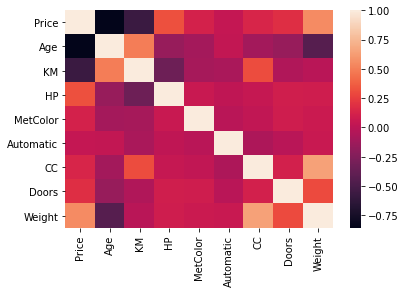

In [55]:
import seaborn as sns
sns.heatmap(data_correlation)

In [64]:
columns = np.full((data_correlation.shape[0],), True, dtype=bool)
print(columns)
for i in range(data_correlation.shape[0]):
    for j in range(i+1, data_correlation.shape[0]):
        if data_correlation.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
data_tmp=data_ohe.iloc[:,3:]
data_tmp

[ True  True  True  True  True  True  True  True  True]


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.000000,46986.000000,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,13750.0,23.000000,72937.000000,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,13950.0,24.000000,41711.000000,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,14950.0,26.000000,48000.000000,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,13750.0,30.000000,38500.000000,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...
1430,8450.0,80.000000,23000.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,7500.0,55.753017,20544.000000,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,10845.0,72.000000,69123.607413,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,8500.0,55.753017,17016.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [70]:
selected_columns = data_tmp.columns[columns]
print(data_tmp.shape,selected_columns.shape)
data_tmp=data_tmp[selected_columns]
data_tmp

(1336, 9) (9,)


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.000000,46986.000000,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,13750.0,23.000000,72937.000000,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,13950.0,24.000000,41711.000000,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,14950.0,26.000000,48000.000000,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,13750.0,30.000000,38500.000000,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...
1430,8450.0,80.000000,23000.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,7500.0,55.753017,20544.000000,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,10845.0,72.000000,69123.607413,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,8500.0,55.753017,17016.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [80]:
data_final=data_ohe.iloc[:,0:3]
# print(data_ohe)
data_final=pd.concat([data_final,data_tmp],axis=1)

In [81]:
data_final

,CNG,Diesel,Petrol,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,1,0,13500.0,23.000000,46986.000000,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,0,1,0,13750.0,23.000000,72937.000000,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,0,1,0,13950.0,24.000000,41711.000000,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,0,1,0,14950.0,26.000000,48000.000000,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,0,1,0,13750.0,30.000000,38500.000000,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0,0,1,8450.0,80.000000,23000.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,0,0,1,7500.0,55.753017,20544.000000,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,0,0,1,10845.0,72.000000,69123.607413,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,0,0,1,8500.0,55.753017,17016.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [87]:
data_final.isnull().sum().sum()

0